In [2]:
import networkx as nx
import matplotlib.pyplot as plt 

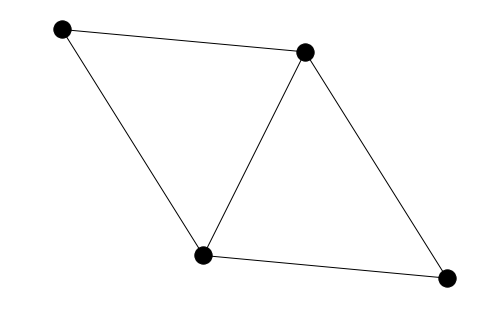

In [53]:
A = nx.Graph()         #无多重边无向图
#A.add_edge('A','B')
A.add_edges_from([('A','B'),('B','C'),('C','A'),('A','D'),('C','D')])
nx.draw(A,node_color = 'black',with_labels=False)
plt.show()

 nx.draw(G)中的参数说明
      - `node_size`:  指定节点的尺寸大小(默认是300，单位未知，就是上图中那么大的点)
      - `node_color`:  指定节点的颜色 (默认是红色，可以用字符串简单标识颜色，例如'r'为红色，'b'为绿色等，具体可查看手册)
      - `node_shape`:  节点的形状（默认是圆形，用字符串'o'标识，具体可查看手册）
      - `alpha`: 透明度 (默认是1.0，不透明，0为完全透明) 
      - `width`: 边的宽度 (默认为1.0)
      - `edge_color`: 边的颜色(默认为黑色)
      - `style`: 边的样式(默认为实现，可选： solid|dashed|dotted,dashdot)
      - `with_labels`: 节点是否带标签（默认为True）
      - `font_size`: 节点标签字体大小 (默认为12)
      - `font_color`: 节点标签字体颜色（默认为黑色）

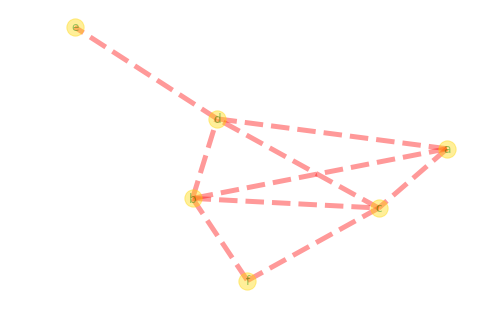

In [130]:
import os
filepath = "C:\\Users\\admin\\MachineLearning--学生版"
os.chdir(filepath)
filename = "k_shell_test.txt"
G=nx.Graph()
with open(filename) as file:
    for line in file:
        head, tail = [str(x) for x in line.split()]  #如果节点使用数组表示的可以将str(x)改为int(x)
        G.add_edge(head,tail)
nx.draw(G,node_color = 'gold',with_labels = True,node_size = 300,width = 5,edge_color = 'r',alpha = 0.4,style = "dashed",font_color = 'g')
plt.show()

In [1]:
A.add_node(14)           #一次添加一个节点
#通过下面二行显示


NameError: name 'A' is not defined

In [34]:
list = [2,3]            #从一个list中添加节点
A.add_nodes_from(list)

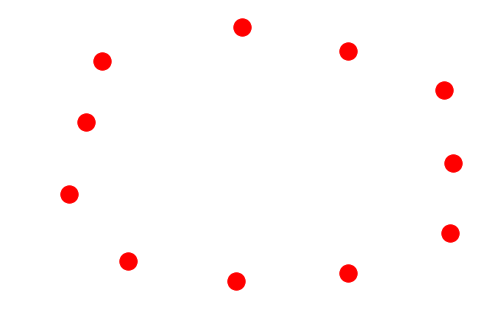

In [67]:
#从nbunch中添加节点，nbunch是任何可迭代的节点容器（如list、set、graph、file等），nbunch本身不是图中的一个节点。
H=nx.path_graph(10) #H是一个有10个节点的链状图，即有n个节点n-1条边的连通图
A.add_nodes_from(H) #或者G.add_nodes_from(H.nodes())   
A.add_node(H)
nx.draw(A)
plt.show()

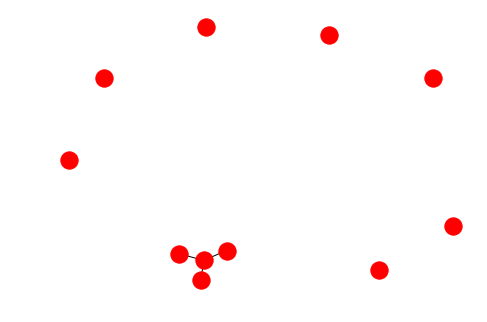

In [69]:
#边 
#一个图G可以通过一次添加一条边来构成：
A.add_edge(1,2)
#也可以通过添加list来添加多条边：
#A.add_edges_from([(1,4),(1,5)])
nx.draw(A)
plt.show()




#等价于

e=(1,2)        #e是一个元组
G.add_edge(*e) #这是python中解包裹的过程
1
2
3
4
5
6

1
或者通过添加任何ebunch来添加边，一个ebunch是任何可迭代的边的元组，一个边的元组可以是两个节点之间的一个2元组（无权值的边）或者3元组（3元组还有一个元素是边的权值，比如(1,2,{‘weight’:100})）。下面将进一步讨论边的属性：

G.add_edges_from(H.edges()) #不能写作G.add_edges_from(H)
1
我们可以用类似的方法拆除图： 
G.remove_node(),G.remove_nodes_from(),G.remove_edge(),G.remove_edges_from() 
比如：

G.remove_node(H)
1
如果你添加的节点和边是已经存在的，是不会报错的。比如，我们先将图G里的所有节点和边删除：

G.clear()
1
然后我们新的节点和边，NetworkX会自动忽略掉已经存在的边和节点的添加：

G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")       #添加节点"spam"
G.add_nodes_from("spam") #添加节点's' 'p' 'a' 'm'
1
2
3
4
5
此时图G一共有8个节点和2条边。 
我们可以通过如下函数查看：

print G.number_of_nodes()
print G.number_of_edges()
1
2
此时对应的网络G的图形为： 
这里写图片描述

我们还可以查阅当前图G的实际情况： 
这里写图片描述

当我们通过某一种图类创建一个图形结构的实例时，我们可以指定好几种不同格式的数据: 
这里写图片描述 
可以看到将图G转化为有向图赋给H之后，有向图H由无向图G中的两条无向边转变为4条有向边。后面一个例子是将list直接传到类Graph中，创建由list中的边组成的无向图H。

节点和边的使用 
你可能已经注意到在NetworkX中节点和边并没有被指定一个对象，因此你就可以自由地指定节点和边的对象。最常见的对象是数值和字符串，但是一个节点可以是任意hash对象（除了None对象），一条边也可以关联任意的对象x，比如： 
G.add_edge(a,b,object=x)。 
举个关于边关联对象的例子，加入a和b是两个人，而他们两个人之间的联系（边），可以是一个概率，即边的对象是一个概率值，表示这两个人之间每天通电话的可能性。

可以看到这是十分强大而且有用的，但是如果你滥用该方法将会导致意想不到的后果，除非你对Python真的很熟悉。如果你不是很确定，你可以考虑使用conver_node_label_to_integers()，他可以将一个图的所有节点按顺序转化为整数对象赋给另一个图。

访问边 
除了上面的提到的那些访问节点和边的方法以外（ eg: Graph.nodes(),Graph.edges(),Graph.neighbors()…），当你只是想想要遍历它们时，迭代的版本(eg: Graph.edges_iter())可以省去返回它们时创建如此很大的一个表去存储它们。

快速直接的访问图的数据结构可以通过下表来实现。 
（注意：不要去改变返回的字典，因为它是图数据结构中的一部分，直接的操作可能导致图处于一个不一致的状态。） 
这里写图片描述

但是我们可以很安全的去改变一条已存在的边的属性（权值）： 
这里写图片描述

如果想要快速遍历每一条边，我们可以使用邻接迭代器实现，对于无向图，每一条边相当于两条有向边： 
这里写图片描述 
(add_weight_edges_from函数的作用是通过一个ebunch添加一些节点和边，边默认其属性为”weight”) 
说明：其实FG.adjacency_iter()返回的是一个所有节点的二元组(node, adjacency dict)的迭代器，比如上述代码中对于节点1返回的是:（1，{2：{0.125}，3：{0.75}}）。

一种方便的访问所有边的方法: 
这里写图片描述

给图、节点和边添加属性

属性诸如weight,labels,colors,或者任何对象，你都可以附加到图、节点或边上。 
对于每一个图、节点和边都可以在关联的属性字典中保存一个（多个）键-值对。默认情况下这些是一个空的字典，但是我们可以增加或者是改变这些属性通过使用add_edge,add_node或者字典操作这些属性字典，比如G.graph,G.node或者G.edge。

图的属性 
可以在创建图时分配图的属性： 
这里写图片描述

你也可以修改已有的属性： 
这里写图片描述

你也可以随时添加新的属性到图中： 
这里写图片描述

节点的属性 
通过add_node(),add_nodes_from给节点添加属性或者G.node[][]来修改属性（前面两种在添加的是已存在的节点时，也可以看做是修改节点属性 ）： 
这里写图片描述

注意添加一个节点是G.add_node而不是G.node。

边点的属性 
通过add_edge(),add_edges_from()来添加边的属性,下表或者G.edge[][][]来修改属性。 
这里写图片描述

注意：注意什么时候使用‘=’，什么时候使用‘:’；什么时候有引号什么时候没有引号。

特殊属性weight应该是一个数值型的，并且在算法需要使用weight时保存该数值。

有向图 
DiGraph类提供了许多有向图中的额外算法，比如DiGraph.out_edges(),DiGraph.in_degree(),DiGraph.predecessors(),DiGraph.successors()等。为了让算法可以在两类图中都可以工作，无向图中的neighbors()和degree()分别等价于有向图中的successors()和有向图中的in_degree()和out_degree()的和。虽然这样有时候会让我们感觉不太一致。 
这里写图片描述

有些算法只能在有向图中使用，而有些图并没有为有向图定义。确实将有向图和无向图混在在一起是很危险的一件事情，所以，如果有些实验你想把一个有向图看做一个无向图，你可以将有向图转化为无向图，通过：

H=DG.to_undirected()

#或者

H=nx.Graph(DG)

多图(Multigraphs) 
NetworkX提供了一个类，它可以允许任何一对节点之间有多条边。类MultiGraph和类MultiDiGraph允许添加相同的边两次，这两条边可能附带不同的权值。对于有些应用程序这是非常有用的类，但是许多算法不能够很好的在这样的图中定义，比如最短路径算法，但是像MultiGraph.degree这种算法又可以很好的被定义。否则你应该为了很好的定义测量，而将图转化为标准的图。 
这里写图片描述

图的生成器和图的操作 
除了通过节点和边生成图，也可以通过以下方法产生：

使用典型的图形操作： 
subgraph(G, nbunch) - 产生nbunch节点的子图 
union(G1,G2) - 结合图 
disjoint_union(G1,G2) - 假设所有节点都不同，然后结合图 
cartesian_product(G1,G2) - 返回笛卡尔乘积图 
compose(G1,G2) - 结合两个图并表示两者共同的节点 
complement(G) - 图G的补图 
create_empty_copy(G) - 返回同一类图的无边副本 
convert_to_undirected(G) - 返回G的无向图 
convert_to_directed(G) - 返回G的有向图

调用经典的小图

petersen=nx.petersen_graph()
tutte=nx.tutte_graph()
maze=nx.sedgewick_maze_graph()
tet=nx.tetrahedral_graph()

使用一些图形生成器
K_5=nx.complete_graph(5)
K_3_5=nx.complete_bipartite_graph(3,5)
barbell=nx.barbell_graph(10,10)
lollipop=nx.lollipop_graph(10,20)

使用随机图发生器
er=nx.erdos_renyi_graph(100,0.15)
ws=nx.watts_strogatz_graph(30,3,0.1)
ba=nx.barabasi_albert_graph(100,5)
red=nx.random_lobster(100,0.9,0.9)

通过读取存储在文件中的一些标准图形格式，例如边表，邻接表，GML，GraphML，pickle，LEAD或者其他的一些格式：
nx.write_gml(red,"path.to.file")
mygraph=nx.read_gml("path.to.file")

详细的图的格式请参考官网：Reading and writing graphs 
详细的图的产生函数请参考官网：Graph generators

分析图 
图G的结构可以通过各种图论的函数来分析，例如：

>>> G=nx.Graph()
>>> G.add_edges_from([(1,2),(1,3)])
>>> G.add_node("spam")       # adds node "spam"

>>> nx.connected_components(G)
[[1, 2, 3], ['spam']]

>>> sorted(nx.degree(G).values())
[0, 1, 1, 2]

>>> nx.clustering(G)
{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}

返回节点属性的函数是通过返回一个以节点为键的字典来实现的：

>>> nx.degree(G)
{1: 2, 2: 1, 3: 1, 'spam': 0}
1
2
对于一些特定节点的值，我们可以提供该特定节点（集）的nbunch作为函数参数。如果被指定的是单个节点，则返回一个对应的单一的值，如果被指定的是一个nbunch,则返回一个字典：

>>> nx.degree(G,1)
2
>>> G.degree(1)
2
>>> G.degree([1,2])
{1: 2, 2: 1}
>>> sorted(G.degree([1,2]).values())
[1, 2]
>>> sorted(G.degree().values())
[0, 1, 1, 2]

绘制图 
NetworkX并不是专门用来绘图的包，但是Matplotlib以及一些接口却提供了很好的绘图功能。 
Python3.0以上的版本可能不能很好的兼容NetworkX中的绘图包。

首先我们导入Matplotlib的plot接口（pylab也可以）

import matplotlib.pyplot as plt

#或者

import matplotlib.pylab as plt

你可能会发现使用“ipthon -pylab”q去交互测试代码是很有用的，它提供了强大的ipython和matplotlib，也提供了一个方便的交互模式。

测试networkx.drawing是是否导入成功，可以通过：

nx.draw(G)
nx.draw_random(G)
nx.draw_circular(G)
nx.draw_spectral(G)

你要将这个图形绘制到屏幕，你可能需要Matplotlib:

plt.show()
如果你不需要显示，那你可以将图像保存到一个文件：

nx.draw(G)
plt.savefig("path.png")

最基础的NetworkX的介绍和使用说明到这里就先结束了，后期还会继续学习更深入的NetworkX和复杂网络相结合的相关用法。

In [7]:
B = nx.DiGraph()      #无多重边有向图

In [8]:
C = nx.MultiGraph()   #有多重边无向图

In [10]:
D = nx.MultiDiGraph() #有多重边有向图

node degree clustering
0 3 0.000000
1 2 1.000000
2 4 0.333333
3 3 0.666667
4 4 0.333333
5 3 0.666667
6 4 0.666667
7 6 0.333333
8 6 0.400000
9 5 0.300000
#D:\Anaconda3\lib\site-packages\ipykernel_launcher.py -f C:\Users\admin\AppData\Roaming\jupyter\runtime\kernel-5cf458ec-6577-42fa-91b3-aaac43bfec0a.json
# GMT Mon Jul 23 04:50:55 2018
# 
0 2 9 4
1 9 7
2 7 8 5
3 9 8 6
4 7 5 8
5 8
6 7 8 9
7 8 9
8
9


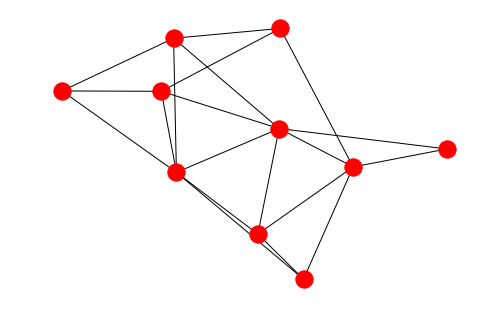

In [136]:
import sys

import matplotlib.pyplot as plt
from networkx import nx

n = 10  # 10 nodes
m = 20  # 20 edges

G = nx.gnm_random_graph(n, m)

# some properties
print("node degree clustering")
for v in nx.nodes(G):
    print('%s %d %f' % (v, nx.degree(G, v), nx.clustering(G, v)))

# print the adjacency list to terminal
try:
    nx.write_adjlist(G, sys.stdout)
except TypeError:  # Python 3.x
    nx.write_adjlist(G, sys.stdout.buffer)

nx.draw(G)
plt.show()

In [1]:
import pulp